<a href="https://colab.research.google.com/github/FreddyMLS/Diplom/blob/%D0%9A%D0%BE%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F(v-1.3)/v_1_4_%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC(%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D1%8C%7B%D1%87%D0%B8%D1%81%D0%BB%D0%BE%7D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import pandas as pd

from keras.utils import to_categorical

import numpy as np

from sklearn.metrics import classification_report

In [ ]:
#Подключение к Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Архитектура нейронной сети

In [ ]:
def model_neuron(input_dim, num_classes):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_dim=input_dim, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
  ])
  return model

#Функции

In [ ]:
# Построение графиков прогресса обучения
def charts(history,epochs):
  
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')
  plt.grid()

  plt.subplot(2, 1, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.grid()
  plt.show()

In [ ]:
#Перевод y в формат [0,1,2,3, ...]
def str_in_int(x):
  labels = x
  label_to_id = {label: idx for idx, label in enumerate(set(labels))}
  vector = [label_to_id[label] for label in labels]
  return vector

#Ирисы

In [95]:
# Загрузка данных
iris = load_iris()
x = iris.data
y = iris.target

In [96]:
#Кореляция данных к классам
y1 = pd.DataFrame(y, columns =["4"])
x1 = pd.DataFrame(x)
df_iris = pd.concat([x1, y1], axis=1)

correlations = df_iris.corr()['4'].drop('4')
display(correlations)

0    0.782561
1   -0.426658
2    0.949035
3    0.956547
Name: 4, dtype: float64

In [ ]:
# Разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train_iris, y_test_iris = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [ ]:
# Стандартизация данных
scaler = StandardScaler()
x_train_iris = scaler.fit_transform(x_train)
x_test_iris = scaler.transform(x_test)

In [ ]:
#Количество признаков
input_dim_iris = x_train_iris.shape[1]

In [ ]:
#Количество классов
num_classes_iris = len(set(y_train_iris))

In [ ]:
#Перевод классов в формат one-hot encoding
vector_y_train_iris = to_categorical(y_train_iris, num_classes_iris)
vector_y_test_iris = to_categorical(y_test_iris, num_classes_iris)

In [ ]:
#Компиляция модели
model_iris=model_neuron(input_dim_iris,num_classes_iris)
model_iris.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Обучение модели
epochs = 100
history = model_iris.fit(x_train_iris, vector_y_train_iris,validation_data=(x_test_iris, vector_y_test_iris), epochs=epochs, batch_size=9, verbose=0)

In [ ]:
# Оценка качества модели на тестовой выборке
loss, accuracy = model_iris.evaluate(x_test_iris, vector_y_test_iris, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 100.00


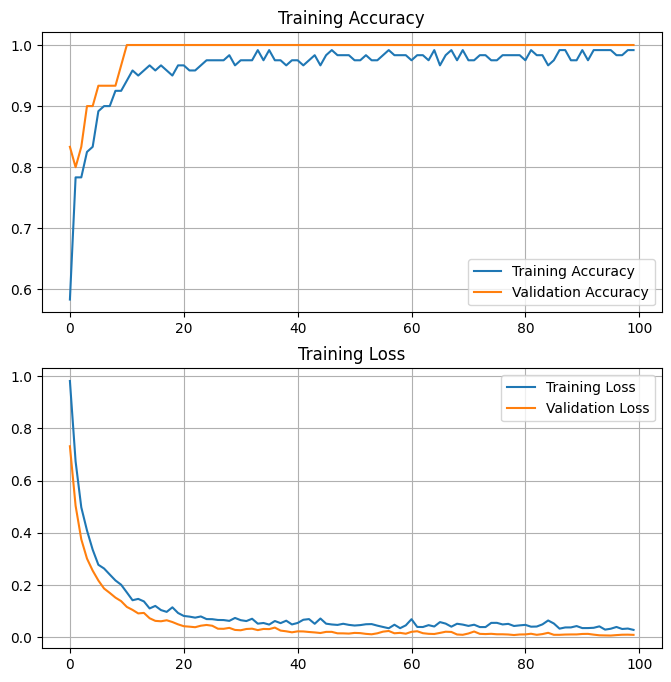

In [ ]:
#Построение графиков обучения модели
charts(history,epochs)

In [ ]:
#Предсказание модели
y_pred_iris = model_iris.predict(x_test_iris)
y_pred_classes_iris = np.argmax(y_pred_iris, axis=1)
y_test_classes_iris = np.argmax(vector_y_test_iris, axis=1)

1/1 [==============================] - 0s 63ms/step


In [ ]:
#вывод classification_report
print(classification_report(y_test_classes_iris, y_pred_classes_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#Вино

In [ ]:
#Загрузка данных
df = pd.read_csv("/content/drive/MyDrive/winequality-red.csv")
display(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
x_data = df.drop('quality', axis=1)
y_data = df['quality']

In [64]:
#Кореляция признаков к классам
correlations = df.corr()['quality'].drop('quality')
display(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

In [ ]:
#Разброс(доделать график)
counts = np.bincount(y_data)
print(counts)

[  0   0   0  10  53 681 638 199  18]


In [58]:
tf = str_in_int(y_data)

In [59]:
counts = np.bincount(tf)
print(counts)

[ 10  53 681 638 199  18]


In [ ]:
# Разделение данных на обучающую и тестовую выборки
x_train_wine, x_test_wine, y_train_wine, y_test_wine = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [ ]:
#Стандартизация данных
scaler = StandardScaler()
x_train_wine = scaler.fit_transform(x_train_wine)
x_test_wine = scaler.transform(x_test_wine)

In [ ]:
#Количество признаков
input_dim_wine = x_train_wine.shape[1]

In [ ]:
#Количестов классов
num_classes_wine = len(set(y_train_wine))

In [ ]:
#Перевод классов в формат от 0 до (количество классов)
y_train_wine = np.array(str_in_int(y_train_wine))
y_test_wine = np.array(str_in_int(y_test_wine))

In [ ]:
#Перевод классов в формат one-hot encoding
vector_y_train_wine = to_categorical(y_train_wine, num_classes_wine)
vector_y_test_wine = to_categorical(y_test_wine, num_classes_wine)

In [ ]:
#Компиляция модели
model_wine=model_neuron(input_dim_wine,num_classes_wine)
model_wine.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Обучение модели
epochs_wine = 200
history = model_wine.fit(x_train_wine, vector_y_train_wine,validation_data=(x_test_wine, vector_y_test_wine), epochs=epochs_wine, batch_size= 16, verbose=0)

In [ ]:
# Оценка качества модели на тестовой выборке
loss, accuracy = model_wine.evaluate(x_test_wine, vector_y_test_wine, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 67.81


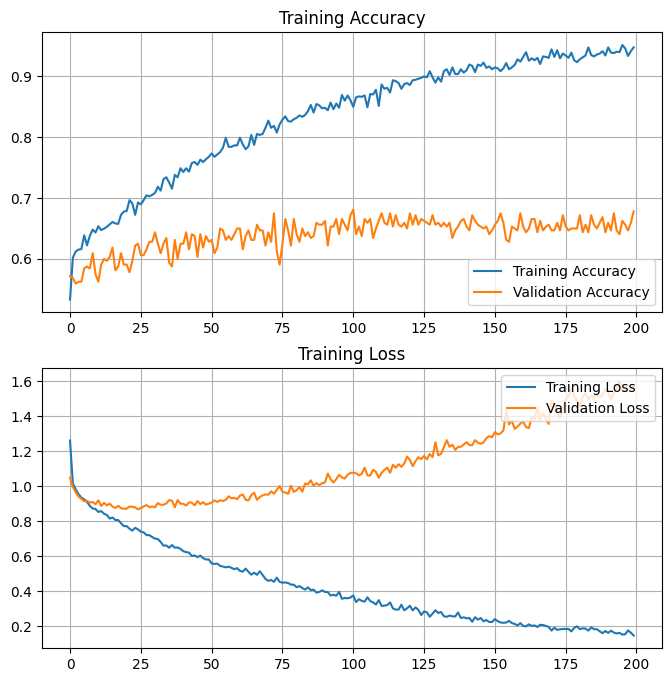

In [ ]:
#Построение графиков
charts(history,epochs_wine)

In [ ]:
#Предсказание модели
y_pred_wine = model_wine.predict(x_test_wine)
y_pred_classes_wine = np.argmax(y_pred_wine, axis=1)
y_test_classes_wine = np.argmax(vector_y_test_wine, axis=1)

10/10 [==============================] - 0s 2ms/step


In [ ]:
#вывод classification_report
print(classification_report(y_test_classes_wine, y_pred_classes_wine))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.40      0.20      0.27        10
           2       0.72      0.70      0.71       130
           3       0.65      0.68      0.67       132
           4       0.56      0.64      0.60        42
           5       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.39      0.37      0.37       320
weighted avg       0.65      0.66      0.65       320



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
